In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cereals.csv')

In [3]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
len(df)

77

In [5]:
df.head(17)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [6]:
len(df)*len(df.columns)

1232

In [7]:
manufacturer_dict = {
  'A': 'American Home Food Products;',
  'G': 'General Mills',
  'K': 'Kelloggs',
  'N': 'Nabisco',
  'P': 'Post',
  'Q': 'Quaker Oats',
  'R': 'Ralston Purina ',
}

Changing for the type column, instead of C and H, we want to use the labels of the these variables as Hot and Cold in any visualizations

In [8]:
type_dict = {
    'C':'Cold',
    'H' : 'Hot'
}
    
    

Exploratory Data Analysis to understand the dataset and derive relationships from those data

We will begin with subplotting

In [9]:
default_subplot_adjustment = {
    
    'left':None,
    'bottom': None,
    'right': None,
    'top': None,
    'wspace':0.4,
    'hspace':0.4
    
}

In [10]:
def subplots_grid_visualizer(
  dataframe: pd.DataFrame,
  columns: list[str],
  visualizer: callable,
  n_cols: int = 5,
  subplot_col_width: float = 7.5,
  subplot_col_height: float = 5,
  color_palette = sns.color_palette('Paired'),
  subplots_adjustment: dict = default_subplot_adjustment,
  title: str = None,
  figsize: tuple[float, float] = None
) -> None:
  df_subplot = dataframe.copy(deep=True)
  # subplots grid configuration
  total_columns = len(columns)
  cols_to_display = n_cols
  rows_to_display = ceil(total_columns / cols_to_display)

  # subplots sizing
  if not figsize:
    figsize = (
      cols_to_display * subplot_col_width,
      rows_to_display * subplot_col_height
    )
# subplots initialization
  fig, axes = plt.subplots(rows_to_display, cols_to_display, figsize=figsize)
  if title:
    plt.suptitle(title, fontsize='xx-large')

  # set the spacing between subplots
  plt.subplots_adjust(**subplots_adjustment)

  # the actual plotting
  for index, col in enumerate(columns):
    ax = axes[
      int(index / cols_to_display),
      int(index % cols_to_display)
    ]
    visualizer(df_subplot, index, col, ax, color_palette)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [12]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


understanding the non numeric datatypes

In [14]:
df.select_dtypes(exclude=np.number).dtypes

name    object
mfr     object
type    object
dtype: object

now we work on seeing the distribution of the dataset

In [15]:
TARGET_VARIABLE = 'rating' #@param {type: 'string'}
# TARGET_VARIABLE = 'fiber' #@param {type: 'string'}

In [16]:
df['type'].unique()

array(['C', 'H'], dtype=object)

In [17]:
df['type'].count()

77

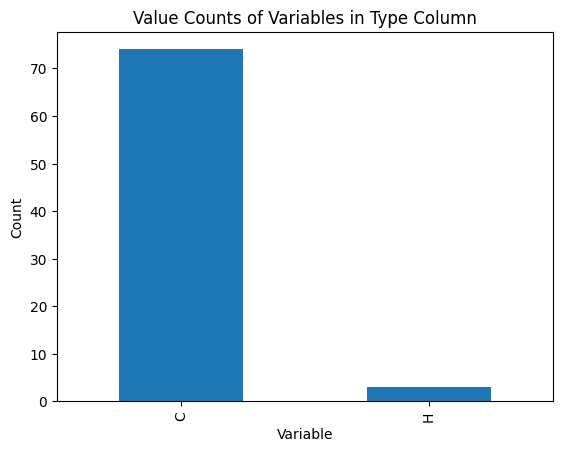

In [18]:
counts = df['type'].value_counts()
counts.plot(kind='bar')


plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Value Counts of Variables in Type Column')

plt.show()

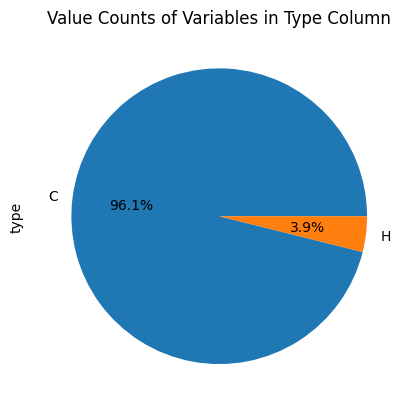

In [19]:
type_count = df['type'].value_counts()
type_count.plot.pie(
autopct='%1.1f%%',
)

plt.title('Value Counts of Variables in Type Column')

plt.show()

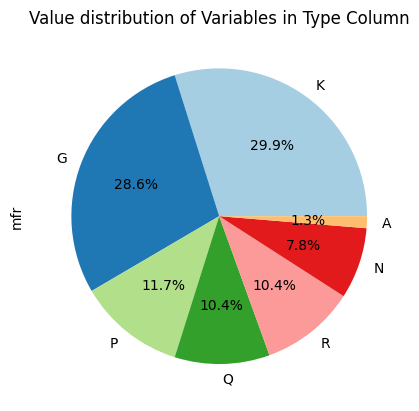

In [20]:
mfr_distribution= df['mfr'].value_counts()
mfr_distribution.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Paired'),
    fontsize=10
)
plt.title('Value distribution of Variables in Type Column')

plt.show()

In [21]:
df[df['mfr']=='K']

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
21,Crispix,K,C,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00,46.895644
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
25,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.00,0.75,31.435973
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141


Overall data with histograms to see the distribution of all the data

In [22]:
to_exclude = [
    'type',
    'mfr'
]
columns_to_boxplot = [col for col in columns_to_plot if col not in to_exclude]


counts = columns_to_boxplot
sns.boxplot(data=df[counts], orient='h', palette='Set2')

plt.title('Box plot for all continuous variables in the dataset')

plt.show()




NameError: name 'columns_to_plot' is not defined

In [ ]:
plt.figure(figsize=(15,10))
_ = sns.heatmap(
df.corr().abs(),
annot=True,
fmt='.2g',
cmap='Blues'
)

In [ ]:
plt.hist(df['mfr'], bins=10, edgecolor='yellow')
plt.xlabel('mfr')
plt.ylabel('Frequency')
plt.title('Histogram of rating distribution')
plt.show()

In [ ]:
correlation_columns = df.select_dtypes(include=np.number).columns
correlation_columns_to_ignore = [
    'name',
    TARGET_VARIABLE
]

correlation_columns_to_plot = [col for col in correlation_columns if col not in correlation_columns_to_ignore]
sns.set_theme(style='white')
def correlation_visualizer(df_subplot, index, col, ax, color_palette)-> None:
    temp_correlation_plot = sns.histplot(
    data=df_subplot,
    x=col,
    y=TARGET_VARIABLE,
    ax=ax,
    palette=color_palette,
    )
    
    subplots_grid_visualizer(
    Title = 'oVERALL CEREALS DATASET CORRELATION',
    dataframe = df,
    columns = correlation_columns_to_plot,
    n_cols=6, visualizer = correlation_visualizer,
    
    subplots_adjustment={
    'top': 0.9,
    'bottom': None,
    'wspace': 0.2,
    'hspace': 0.2,
  }
)
                               
                               

In [ ]:
def subplots_grid_visualizer(
  dataframe: df,
  columns: list[str],
  visualizer: callable,
  n_cols: int = 5,
  subplot_col_width: float = 7.5,
  subplot_col_height: float = 5,
  color_palette = sns.color_palette('Paired'),
  subplots_adjustment: dict = default_subplot_adjustment,
  title: str = None,
  figsize: tuple[float, float] = None
) -> None:
  df_subplot = dataframe.copy(deep=True)
  # subplots grid configuration
  total_columns = len(columns)
  cols_to_display = n_cols
  rows_to_display = cell(total_columns / cols_to_display)

  # subplots sizing
  if not figsize:
    figsize = (
      cols_to_display * subplot_col_width,
      rows_to_display * subplot_col_height
    )

  # subplots initialization
  fig, axes = plt.subplots(rows_to_display, cols_to_display, figsize=figsize)
  if title:
    plt.suptitle(title, fontsize='xx-large')

  # set the spacing between subplots
  plt.subplots_adjust(**subplots_adjustment)

  # the actual plotting
  for index, col in enumerate(columns):
    ax = axes[
      int(index / cols_to_display),
      int(index % cols_to_display)
    ]
    visualizer(df_subplot, index, col, ax, color_palette)

In [ ]:
columns_to_plot = [ col for col in df.select_dtypes(include=np.number).columns if col not in [ TARGET_VARIABLE ] ]

sns.set_theme(style='white')
subplots_grid_visualizer(
  dataframe=df,
  columns=columns_to_plot,
  n_cols=4,
  visualizer=lambda df_subplot, index, col, ax, color_palette: (
    sns.histplot(data=df_subplot, ax=ax, x=col)
  ),
  subplot_col_width = 7.5,
  subplot_col_height = 5,
  subplots_adjustment={
    'wspace': 0.2,
    'hspace': 0.2,
  }
)

In [ ]:
df.head(77)

In [ ]:
sort_temp_df = df.copy()
sort_temp_df = sort_temp_df.sort_values(by=['rating'], ignore_index=True)

In [ ]:
sns.set_theme(style="ticks")

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x=sort_temp_df.rating.index, y=sort_temp_df.rating)

_ = plt.xlabel('Index')
_ = plt.ylabel('Rating')

In [ ]:
plt.figure(figsize=(10, 5))

# the less steps the more detailed
steps = 10
# steps = 2

# the stepped dataframe jumping by n intervals
stepped_sort_temp_df = sort_temp_df[::steps]
plt.plot(stepped_sort_temp_df.rating.index, stepped_sort_temp_df.rating)

_ = plt.xlabel('Index')
_ = plt.ylabel('Rating')

In [ ]:
plt.figure(figsize=(10, 5))

# the less steps the more detailed
steps = 2
# steps = 

# the stepped dataframe jumping by n intervals
stepped_sort_temp_df = sort_temp_df[::steps]
plt.plot(stepped_sort_temp_df.rating.index, stepped_sort_temp_df.rating)

_ = plt.xlabel('Index')
_ = plt.ylabel('Rating')